#### Author : Maximiliano Lopez Salgado
#### First commit: 2023-05-10
#### Last commit: 2023-05-10
#### Description: This notebook is used to perform EDA on the bike data set

In [7]:
# import ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import folium
#from folium.plugins import HeatMap

<center><h1>Exploratory Data Analysis</center></h1>

#### Formulate some hypothesis and plot the data to check if the hypothesis are true. 
#### I.E: Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well. 
#### Daily Trend: weekdays vs weekends and registered users vs casual users.. 
#### Rain: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days..
#### Temperature: in warm countries, temperature generally keeps people inside. You have to check Washington DC's temperature for making any guess.. 
#### Business model: businesses often rely on registered customers more than casual users. There might be some interesting insights that can strengthen this assumption.

In [14]:
# import bike data
bike = pd.read_csv('/Users/maximilianolopezsalgado/data_projects/capital_bike_sharing/datasets/bike_clean.csv')

# print first 5 rows
bike.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,...,apparent_temp,humidity,windspeed,casual_user,registered_user,count,day_period,warmness,humidity_level,windspeed_level
0,1,2011-01-01,Winter,2011-01-01,January,0,No,Saturday,No,Clear,...,3.0014,0.81,0.0,3,13,16,Dawn,Cold,High,Low
1,2,2011-01-01,Winter,2011-01-01,January,1,No,Saturday,No,Clear,...,1.9982,0.80,0.0,8,32,40,Dawn,Cold,High,Low
2,3,2011-01-01,Winter,2011-01-01,January,2,No,Saturday,No,Clear,...,1.9982,0.80,0.0,5,27,32,Dawn,Cold,High,Low
3,4,2011-01-01,Winter,2011-01-01,January,3,No,Saturday,No,Clear,...,3.0014,0.75,0.0,3,10,13,Dawn,Cold,High,Low
4,5,2011-01-01,Winter,2011-01-01,January,4,No,Saturday,No,Clear,...,3.0014,0.75,0.0,0,1,1,Dawn,Cold,High,Low


### Hipotesis 1

In [16]:
# Hipotesis 1: if the value of the the season column is equal to summer, then the number of bike rentals will be higher than the other seasons
# create a pivot table to check the number of bike rentals in each season and order it in descending order
bike_season = bike.pivot_table(index='season', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_season

,count
season,
Summer,1061129
Spring,918589
Fall,841613
Winter,471348


#### Hipotesis is true, the number of bike rentals is higher during the summer season

### Hipotesis 2

In [19]:
# Hipotesis 2: if the value of the the weather column is equal to clean, then the number of bike rentals will be higher than the other seasons
# Create a pivot table to check the number of bike rentals in each weather and order it in descending order
bike_weather = pd.pivot_table(bike, index='weather', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_weather

,count
weather,
Clear,2338173
Mist-Cloudy,795952
Light-Rain,158331
Heavy-Rain,223


#### Hipotesis is true, the number of bike rentals is higher when the weather is clear

### Hipotesis 3

In [22]:
# Hipotesis 3: if the value of the the temperature column is equal to hot, then the number of bike rentals will be higher than the other seasons
# Create a pivot table to check the number of bike rentals in each warmness and order it in descending orde
bike_warmness = pd.pivot_table(bike, index='warmness', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_warmness

,count
warmness,
Hot,1224500
Cold,832128
Warm,687711
Very Hot,548340


#### Hipotesis 3 is not true, the number of bike rentals is higher when the temperature is very hot

### Hipotesis 4

In [25]:
# hipotesis 4: if the value of the the working day column is equal to yes, then the number of bike rentals by registered members will be higher than the non registered members and vice versa
# use the columns casual and registered to create a pivot table to check the number of bike rentals for each type of customer on workingdays and order it in descending order
bike_users = pd.pivot_table(bike, index='workingday', values=['casual_user', 'registered_user'], aggfunc='sum')
bike_users

,casual_user,registered_user
workingday,,
No,316732,683537
Yes,303285,1989125


#### Hipotesis 4 is true, registered customers rent more bikes than casual customers either in working days or not. Also casual users rent more bikes during weekdays

### Hipotesis 5

In [28]:
# Hipotesis 5: if the value of the the day period column is equal to night, then the number of bike rentals will be higher than the other periods
# Create a pivot table to check the number of bike rentals in each day period
bike_day_period = pd.pivot_table(bike, index='day_period', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_day_period

,count
day_period,
Afternoon,1418100
Morning,1036601
Night,676337
Dawn,161641


#### Hipotesis 5 is false, the number of bike rentals is higher in the afternoon

### Hipotesis 6

In [31]:
# Hipotesis 6: if the value of the the weekday column is equal to monday, tuesday, wednesday, thursday and/or friday, then the number of bike rentals will be higher than the other days
# Create a pivot table to check the number of bike rentals in each weekday
bike_weekday = pd.pivot_table(bike, index='weekday', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_weekday

,count
weekday,
Friday,487790
Thursday,485395
Saturday,477807
Wednesday,473048
Tuesday,469109
Monday,455503
Sunday,444027


#### Hipotesis 6 is not true, the number of bike rentals is higher in friday and thursday, but on saturday the number of bike rentals is bigger than the number of bike rentals in wednesday, tuesday and monday

### Hipotesis 7

In [34]:
# Hipotesis 7: if the value of the the month column is equal to june, july and/or august, then the number of bike rentals will be higher than the other months
# Create a pivot table to check the number of bike rentals in each month
bike_month = pd.pivot_table(bike, index='month', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_month

,count
month,
August,351194
June,346342
September,345991
July,344948
May,331686
October,322352
April,269094
November,254831
March,228920


#### Hipotesis 7 is not true, because despite that the number of bike rentals in august and june are the top 2 on the records, the 3rd month with the highest number of bike rentals is september, which is not a summer month

### Hipotesis 8

In [37]:
# Hipotesis 8: if the value of the the hour column is equal to 8, 17 and/or 18, then the number of bike rentals will be higher than the other hours
# Create a pivot table to check the number of bike rentals in each hour
bike_hour = pd.pivot_table(bike, index='hour', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_hour

,count
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


#### Hipotesis 8 is not true, because the number of bike rentals is higher in the hour 17 and 18, but not in the hour 8

### Hipotesis 9

In [40]:
### Hipotesis 9: if the value of the warmness column is equal to hot, then the number of bike rentals will be higher than the other warmness
# create a pivot table to check the number of bike rentals in each weather and warmness
bike_weather_warmness = pd.pivot_table(bike, index=['warmness'], values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_weather_warmness

,count
warmness,
Hot,1224500
Cold,832128
Warm,687711
Very Hot,548340


#### Hipotesis 9 is true, because the number of bike rentals is higher in the hot warmness

### Hipotesis 10

In [43]:
# Hipotesis 10: if the values of the year column is equal to 2011, then the number of bike rentals will be higher than the other year# create a pivot table to check the number of bike rentals in each holiday
bike_year = pd.pivot_table(bike, index='year', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_year

,count
year,
2012-01-01,2049576
2011-01-01,1243103


#### Hipotesis 10 is not true, the number of bike rentals is higher in 2012

### Hipotesis 11 

In [46]:
# Hipotesis 11: if the values of the windspeed_level column is equal to strong, then the number of bike rentals will be lower than the  when the windspeed is low 
# create a pivot table to check the number of bike rentals in each windspeed level
bike_windspeed_level = pd.pivot_table(bike, index='windspeed_level', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_windspeed_level


,count
windspeed_level,
Medium,1662619
Low,1139251
High,490809


#### Hipotesis 11 is not true, since the number of bike rentals is higher when the windspeed is medium

### Hipotesis 12

In [49]:
# Hipotesis 12: if the values of the humidity_level column is equal to high, then the number of bike rentals will be lower than the  when the humidity is low
# create a pivot table to check the number of bike rentals in each humidity level
bike_humidity_level = pd.pivot_table(bike, index='humidity_level', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
bike_humidity_level

,count
humidity_level,
Medium,1766342
High,818029
Low,708308


#### Hipotesis 12 is not true, the number of bike rentals is higher when the humidity is high

<center><h1>Trip History Dataset</center></h1>

In [51]:
# import trip history dataset  
trip = pd.read_csv('../datasets/trip_history.csv')

# print first 5 rows
trip.head()

,Duration,Start station,End station
0,59.133333,5th & F St NW,5th & F St NW
1,5.766667,14th & Harvard St NW,14th & V St NW
2,9.366667,Georgia & New Hampshire Ave NW,Adams Mill & Columbia Rd NW
3,7.233333,10th & U St NW,Florida Ave & R St NW
4,3.883333,Adams Mill & Columbia Rd NW,Calvert & Biltmore St NW


In [52]:
# check data types
trip.dtypes

Duration         float64
Start station     object
End station       object
dtype: object

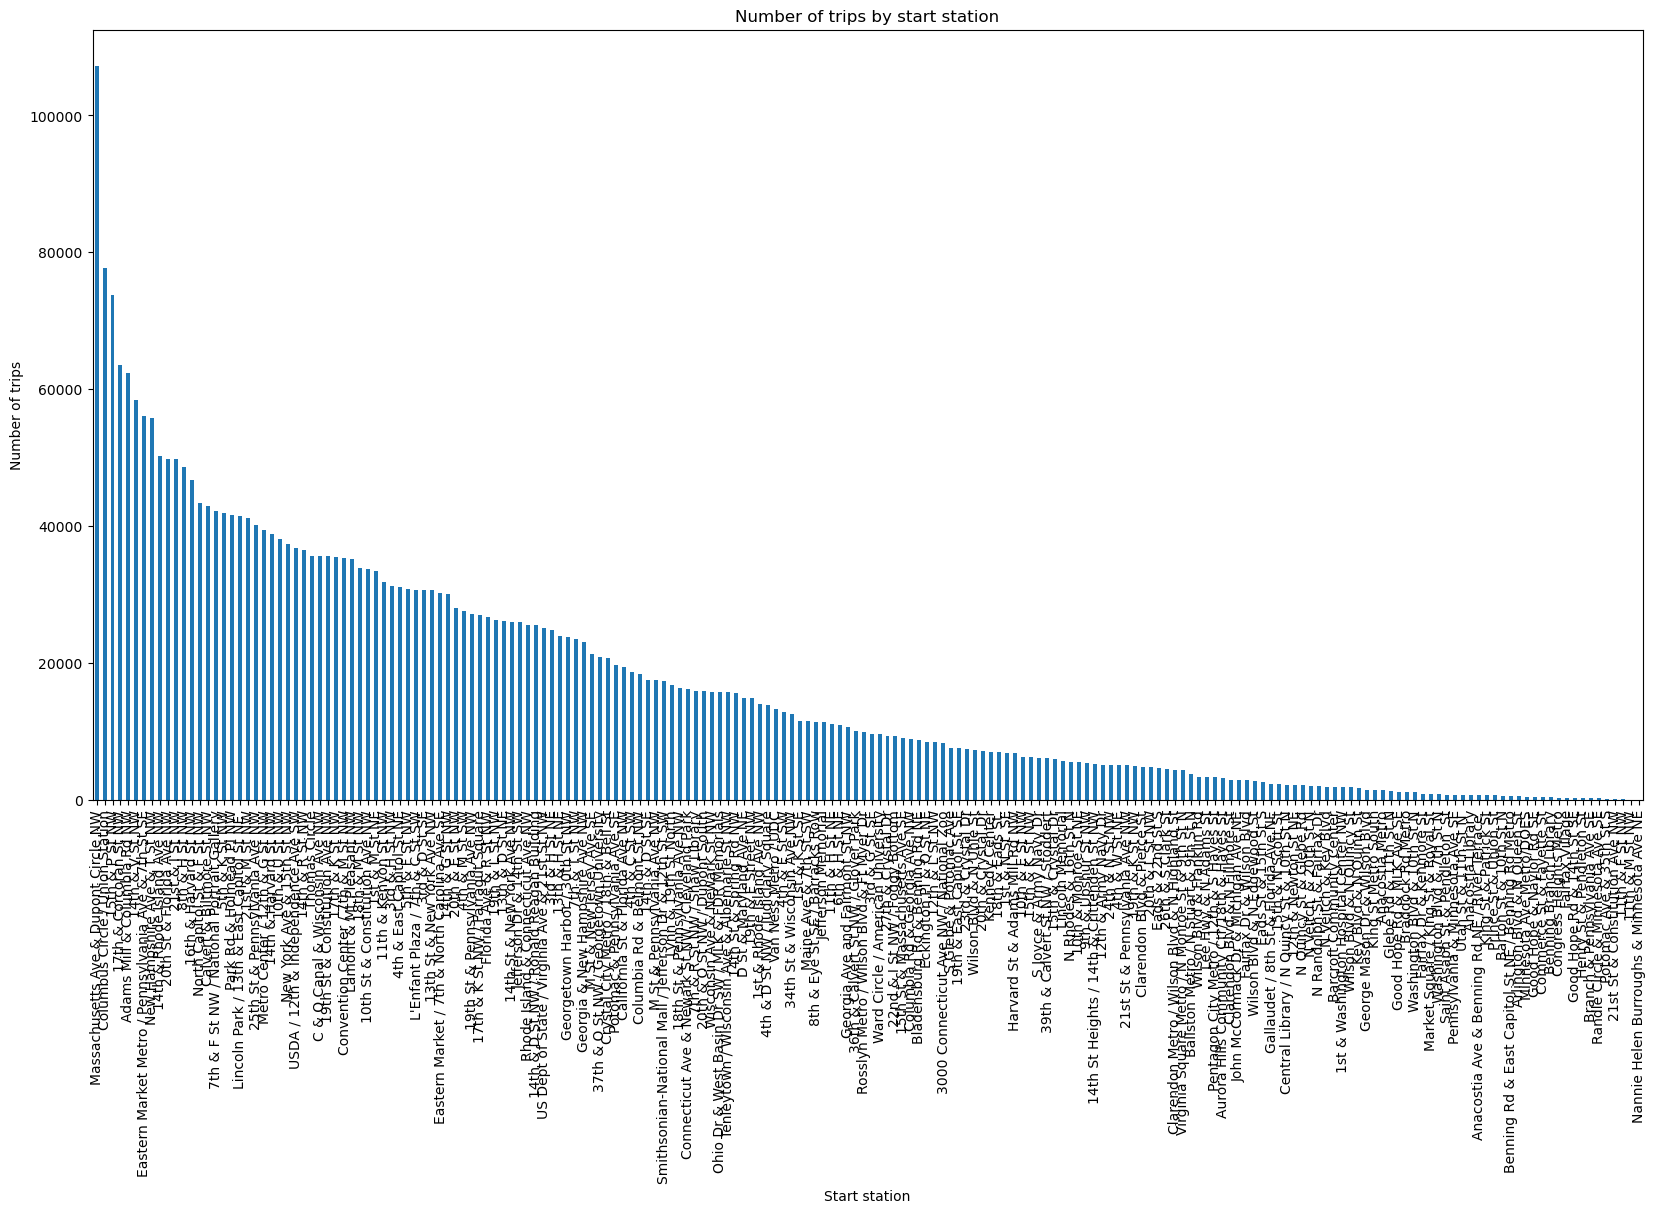

In [53]:
# create a a plot to show the number of trips by start station in the map of washington DC
trip['Start station'].value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Number of trips by start station')
plt.xlabel('Start station')
plt.ylabel('Number of trips')
plt.show()

In [54]:
# count values of the top 50 end station column
trip['End station'].value_counts().head(50)

Massachusetts Ave & Dupont Circle NW                   118707
15th & P St NW                                          83457
Columbus Circle / Union Station                         79681
17th & Corcoran St NW                                   67382
14th & V St NW                                          59658
New Hampshire Ave & T St NW                             57145
8th & H St NW                                           54811
21st & I St NW                                          54259
Eastern Market Metro / Pennsylvania Ave & 7th St SE     54070
Adams Mill & Columbia Rd NW                             52546
14th & Rhode Island Ave NW                              52350
20th St & Florida Ave NW                                49238
7th & F St NW / National Portrait Gallery               46112
North Capitol St & F St NW                              45485
C & O Canal & Wisconsin Ave NW                          44979
21st & M St NW                                          44542
5th & K 

In [ ]:
# utilize geospatial visualization librarie to create a map of washington DC and plot the number of trips by start station
# import folium                         ---- already imported
# from folium.plugins import HeatMap  ---- already imported

# create a map of washington DC
map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# create a list of the latitude and longitude of the start stations
trip_location = trip[['Start station latitude', 'Start station longitude']].values.tolist()

# create a list of the latitude and longitude of the start station
trip_location = trip[['Start station latitude', 'Start station longitude']].values.tolist()

# plot the number of trips by start station
HeatMap(trip_location).add_to(map)

# show the map
map